<a href="https://colab.research.google.com/github/A-S-A-M/EEG-BCI-Projects/blob/main/SeizureDetection_via_MLTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ------------------------
# Configuration
# ------------------------
DATA_ROOT = r"D:\Downloads\EEG_DATA_REPO\EEGDATA_FILTERED"  # Root folder containing EEG data organized by class
CHANNELS = ['F','N','O','S','Z']  # EEG classes / labels
FIXED_LENGTH = 4096  # Number of timesteps per EEG sample for CNN input

# Lists to store data and labels
X = []  # EEG signals
y = []  # Corresponding labels

# ------------------------
# Load and preprocess EEG signals
# ------------------------
for ch in CHANNELS:
    folder = os.path.join(DATA_ROOT, ch)  # Path to current class folder
    # Get all .txt or _filtered.txt files in folder
    files = [f for f in os.listdir(folder) if f.endswith(".txt") or f.endswith("_filtered.txt")]

    for f in files:
        path = os.path.join(folder, f)
        signal = np.loadtxt(path)  # Load EEG signal as 1D numpy array

        # Pad or truncate signals to FIXED_LENGTH
        if len(signal) < FIXED_LENGTH:
            # Pad with zeros at the end if signal is shorter
            signal = np.pad(signal, (0, FIXED_LENGTH - len(signal)), 'constant')
        else:
            # Truncate if signal is longer than FIXED_LENGTH
            signal = signal[:FIXED_LENGTH]

        # Append processed signal and corresponding label
        X.append(signal)
        y.append(ch)

# Convert lists to numpy arrays
X = np.array(X)  # Shape: [samples, timesteps]
y = np.array(y)  # Shape: [samples]

# ------------------------
# Encode labels as integers
# ------------------------
le = LabelEncoder()
y_enc = le.fit_transform(y)  # Converts labels F,N,O,S,Z → 0,1,2,3,4

# ------------------------
# Add channel dimension for CNN input
# ------------------------
# CNN expects input shape: [samples, timesteps, channels]
X_cnn = X[..., np.newaxis]  # Shape becomes [samples, timesteps, 1]

# ------------------------
# Split dataset into training and testing sets
# ------------------------
# 80% training, 20% testing, stratified to preserve label distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# ------------------------
# Print dataset shapes
# ------------------------
print("Data shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


###DATA REPO

In [ ]:
import os

data_root = '/content/drive/MyDrive/EEG_DATA_REPO'

for root, dirs, files in os.walk(data_root):
    print(f"Directory: {root}")
    for file in files:
        print(f"  {file}")


Directory: /content/drive/MyDrive/EEG_DATA_REPO
  seizure_state_comparison.png
  SeizureDetectionCode.ipynb
  SeizDetect.ipynb
Directory: /content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_EXTRACTED
Directory: /content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_EXTRACTED/N
  n012.txt
  n055.txt
  n087.txt
  n027.txt
  n079.txt
  n097.txt
  n047.txt
  n081.txt
  n092.txt
  n090.txt
  n085.txt
  n076.txt
  n006.txt
  n036.txt
  n017.txt
  n033.txt
  n028.txt
  n048.txt
  n056.txt
  n072.txt
  n069.txt
  n049.txt
  n091.txt
  n013.txt
  n050.txt
  n067.txt
  n073.txt
  n020.txt
  n065.txt
  n001.txt
  n059.txt
  n093.txt
  n046.txt
  n025.txt
  n023.txt
  n022.txt
  n053.txt
  n064.txt
  n005.txt
  n074.txt
  n086.txt
  n014.txt
  n063.txt
  n080.txt
  n095.txt
  n075.txt
  n088.txt
  n071.txt
  n066.txt
  n098.txt
  n034.txt
  n042.txt
  n043.txt
  n054.txt
  n094.txt
  n100.txt
  n099.txt
  n026.txt
  n060.txt
  n004.txt
  n061.txt
  n010.txt
  n030.txt
  n003.txt
  n029.txt
  n057.txt
  n032.txt
  

#CNN starts here


In [ ]:
# Install PyTorch with CUDA support (Colab default is usually CUDA 11.x)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s e

In [ ]:
import os

data_dir = '/content/drive/MyDrive/EEG_DATA_REPO'
print(os.listdir(data_dir))

['seizure_state_comparison.png', 'SeizureDetectionCode.ipynb', 'SeizDetect.ipynb', 'EEGDATA_EXTRACTED', 'EEG_METRICS', 'EEGDATA_FILTERED', 'EEGDATA']


In [ ]:
npz = np.load('/content/drive/MyDrive/EEG_DATA_REPO/EEG_METRICS/Z/Z039.npz')
print(npz.files)

['name', 'stationarity', 'd2_real', 'd2_surr_mean', 'd2_surr_std', 'nle', 'basic']


In [ ]:
import os
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

# --------------------
# Dataset Loader
# --------------------
class EEGDataset(Dataset):
    def __init__(self, data_root, fixed_length=4096):
        self.files = []
        self.labels = []
        self.data_root = data_root
        self.fixed_length = fixed_length

        # Map folder name to integer labels
        label_map = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}

        # Directory containing filtered EEG data
        filtered_data_dir = os.path.join(data_root, 'EEGDATA_FILTERED')

        for folder_name, label in label_map.items():
            folder_path = os.path.join(filtered_data_dir, folder_name)
            if os.path.isdir(folder_path):
                for file in os.listdir(folder_path):
                    if file.endswith(".txt") or file.endswith("_filtered.txt"):
                        self.files.append(os.path.join(folder_path, file))
                        self.labels.append(label)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        signal = np.loadtxt(self.files[idx])

        # Pad or truncate
        if len(signal) < self.fixed_length:
            signal = np.pad(signal, (0, self.fixed_length - len(signal)), 'constant')
        else:
            signal = signal[:self.fixed_length]

        # Standardize signal
        signal = (signal - np.mean(signal)) / (np.std(signal) + 1e-8)

        signal = torch.tensor(signal, dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return signal, label

# --------------------
# Improved CNN
# --------------------
class ImprovedEEGCNN(nn.Module):
    def __init__(self, input_channels=1, num_classes=5):
        super(ImprovedEEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.drop = nn.Dropout(0.3)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.relu(self.bn3(self.conv3(x)))
        x = self.pool(x).squeeze(-1)
        x = self.drop(x)
        x = self.fc(x)
        return x

# --------------------
# DataLoader
# --------------------
data_root = '/content/drive/MyDrive/EEG_DATA_REPO'
dataset = EEGDataset(data_root)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# --------------------
# Training loop
# --------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = ImprovedEEGCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(20):  # train longer
    model.train()
    for x, y in train_loader:
        x = x.unsqueeze(1).to(device)  # add channel dim
        y = y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} done")


In [ ]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for x, y in val_loader:
        x = x.unsqueeze(1).to(device)
        y = y.to(device)
        out = model(x)
        pred = out.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)
print("Validation Accuracy:", correct / total)


Validation Accuracy: 0.44


In [ ]:
import os
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

# --------------------
# Dataset Loader
# --------------------
class EEGDataset(Dataset):
    def __init__(self, data_root, fixed_length=4096):
        self.files = []
        self.labels = []
        self.data_root = data_root
        self.fixed_length = fixed_length

        # Map folder name to integer labels
        label_map = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}

        # Directory containing filtered EEG data
        filtered_data_dir = os.path.join(data_root, 'EEGDATA_FILTERED')

        for folder_name, label in label_map.items():
            folder_path = os.path.join(filtered_data_dir, folder_name)
            if os.path.isdir(folder_path):
                for file in os.listdir(folder_path):
                    if file.endswith(".txt") or file.endswith("_filtered.txt"):
                        self.files.append(os.path.join(folder_path, file))
                        self.labels.append(label)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        signal = np.loadtxt(self.files[idx])

        # Pad or truncate
        if len(signal) < self.fixed_length:
            signal = np.pad(signal, (0, self.fixed_length - len(signal)), 'constant')
        else:
            signal = signal[:self.fixed_length]

        # Standardize signal
        signal = (signal - np.mean(signal)) / (np.std(signal) + 1e-8)

        signal = torch.tensor(signal, dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return signal, label

# --------------------
# Improved CNN
# --------------------
class ImprovedEEGCNN(nn.Module):
    def __init__(self, input_channels=1, num_classes=5):
        super(ImprovedEEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.drop = nn.Dropout(0.3)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.relu(self.bn3(self.conv3(x)))
        x = self.pool(x).squeeze(-1)
        x = self.drop(x)
        x = self.fc(x)
        return x

# --------------------
# DataLoader
# --------------------
data_root = '/content/drive/MyDrive/EEG_DATA_REPO'
dataset = EEGDataset(data_root)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# --------------------
# Training loop
# --------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = ImprovedEEGCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(100):  # train longer
    model.train()
    for x, y in train_loader:
        x = x.unsqueeze(1).to(device)  # add channel dim
        y = y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} done")


Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done
Epoch 6 done
Epoch 7 done
Epoch 8 done
Epoch 9 done
Epoch 10 done
Epoch 11 done
Epoch 12 done
Epoch 13 done
Epoch 14 done
Epoch 15 done
Epoch 16 done
Epoch 17 done
Epoch 18 done
Epoch 19 done
Epoch 20 done
Epoch 21 done
Epoch 22 done
Epoch 23 done
Epoch 24 done
Epoch 25 done
Epoch 26 done
Epoch 27 done
Epoch 28 done
Epoch 29 done
Epoch 30 done
Epoch 31 done
Epoch 32 done
Epoch 33 done
Epoch 34 done
Epoch 35 done
Epoch 36 done
Epoch 37 done
Epoch 38 done
Epoch 39 done
Epoch 40 done
Epoch 41 done
Epoch 42 done
Epoch 43 done
Epoch 44 done
Epoch 45 done
Epoch 46 done
Epoch 47 done
Epoch 48 done
Epoch 49 done
Epoch 50 done
Epoch 51 done
Epoch 52 done
Epoch 53 done
Epoch 54 done
Epoch 55 done
Epoch 56 done
Epoch 57 done
Epoch 58 done
Epoch 59 done
Epoch 60 done
Epoch 61 done
Epoch 62 done
Epoch 63 done
Epoch 64 done
Epoch 65 done
Epoch 66 done
Epoch 67 done
Epoch 68 done
Epoch 69 done
Epoch 70 done
Epoch 71 done
Epoch 72 done
E

In [ ]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for x, y in val_loader:
        x = x.unsqueeze(1).to(device)
        y = y.to(device)
        out = model(x)
        pred = out.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)
print("Validation Accuracy:", correct / total)

Validation Accuracy: 0.89


#LSTM Begins here


###Step 1: Load .txt files

Each .txt contains a 1D signal (say, 4096 samples). We’ll load them, normalize, and stack into tensors.

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# --- Config ---
DATA_ROOT = "/content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_FILTERED"
LABELS = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}   # adjust if needed
SEQ_LEN = 4096   # number of timesteps per signal

# --- Dataset ---
class EEGDataset(Dataset):
    def __init__(self, data_root, seq_len=4096):
        self.samples = []
        self.labels = []
        for folder, label in LABELS.items():
            folder_path = os.path.join(data_root, folder)
            for fname in os.listdir(folder_path):
                if fname.endswith(".txt"):
                    sig = np.loadtxt(os.path.join(folder_path, fname))
                    sig = sig[:seq_len]   # trim/pad
                    if len(sig) < seq_len:
                        sig = np.pad(sig, (0, seq_len - len(sig)))
                    sig = (sig - np.mean(sig)) / (np.std(sig) + 1e-6)  # normalize
                    self.samples.append(sig.astype(np.float32))
                    self.labels.append(label)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x = torch.tensor(self.samples[idx]).unsqueeze(0)  # shape (1, seq_len)
        y = torch.tensor(self.labels[idx]).long()
        return x, y

# build dataset
dataset = EEGDataset(DATA_ROOT, seq_len=SEQ_LEN)

# train/test split
from sklearn.model_selection import train_test_split
train_idx, val_idx = train_test_split(np.arange(len(dataset)), test_size=0.2, stratify=dataset.labels, random_state=42)

from torch.utils.data import Subset
train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32)


###Step 2: Define LSTM Model

In [ ]:
import torch.nn as nn

class EEG_LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, num_classes=5):
        super(EEG_LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=0.3, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)  # *2 for bidirectional

    def forward(self, x):
        # x: (batch, 1, seq_len) → (batch, seq_len, 1)
        x = x.transpose(1,2)  # (batch, seq_len, 1)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # last time step
        return out


###Step 3: Training Loop

In [ ]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EEG_LSTM().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)

EPOCHS = 30
for epoch in range(EPOCHS):
    # --- Train ---
    model.train()
    total_loss, correct, total = 0, 0, 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)  # stabilize training
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == y).sum().item()
        total += y.size(0)

    train_acc = correct / total

    # --- Validation ---
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            val_correct += (outputs.argmax(1) == y).sum().item()
            val_total += y.size(0)
    val_acc = val_correct / val_total

    scheduler.step(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss={total_loss:.3f}, Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")


Epoch 1/30, Loss=20.940, Train Acc=0.200, Val Acc=0.210
Epoch 2/30, Loss=20.885, Train Acc=0.215, Val Acc=0.240
Epoch 3/30, Loss=20.833, Train Acc=0.240, Val Acc=0.200
Epoch 4/30, Loss=20.669, Train Acc=0.258, Val Acc=0.200
Epoch 5/30, Loss=20.424, Train Acc=0.255, Val Acc=0.260
Epoch 6/30, Loss=20.118, Train Acc=0.275, Val Acc=0.260
Epoch 7/30, Loss=19.931, Train Acc=0.312, Val Acc=0.260
Epoch 8/30, Loss=19.991, Train Acc=0.285, Val Acc=0.230
Epoch 9/30, Loss=19.768, Train Acc=0.305, Val Acc=0.220
Epoch 10/30, Loss=19.614, Train Acc=0.315, Val Acc=0.270
Epoch 11/30, Loss=19.507, Train Acc=0.315, Val Acc=0.260
Epoch 12/30, Loss=19.559, Train Acc=0.312, Val Acc=0.250
Epoch 13/30, Loss=19.464, Train Acc=0.333, Val Acc=0.250
Epoch 14/30, Loss=19.477, Train Acc=0.305, Val Acc=0.230
Epoch 15/30, Loss=19.233, Train Acc=0.325, Val Acc=0.260
Epoch 16/30, Loss=19.213, Train Acc=0.333, Val Acc=0.290
Epoch 17/30, Loss=19.154, Train Acc=0.335, Val Acc=0.310
Epoch 18/30, Loss=19.000, Train Acc=0.34

#Improved LSTM

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# --- Config ---
DATA_ROOT = "/content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_FILTERED"
LABELS = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}   # adjust if needed
SEQ_LEN = 4096   # number of timesteps per signal


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
class EEGDataset(Dataset):
    def __init__(self, data_root, seq_len=1024):  # shorter by default
        self.samples = []
        self.labels = []
        for folder, label in LABELS.items():
            folder_path = os.path.join(data_root, folder)
            for fname in os.listdir(folder_path):
                if fname.endswith(".txt"):
                    sig = np.loadtxt(os.path.join(folder_path, fname))
                    # --- downsample if signal is long ---
                    factor = len(sig) // seq_len
                    if factor > 1:
                        sig = sig[::factor]  # pick every Nth sample
                    # --- trim/pad to exact length ---
                    sig = sig[:seq_len]
                    if len(sig) < seq_len:
                        sig = np.pad(sig, (0, seq_len - len(sig)))
                    # --- normalize ---
                    sig = (sig - np.mean(sig)) / (np.std(sig) + 1e-6)
                    self.samples.append(sig.astype(np.float32))
                    self.labels.append(label)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x = torch.tensor(self.samples[idx]).unsqueeze(0)  # (1, seq_len)
        y = torch.tensor(self.labels[idx]).long()
        return x, y


In [5]:
class EEG_LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=2, num_classes=5):
        super(EEG_LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=0.5, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)

    def forward(self, x):
        x = x.transpose(1, 2)            # (batch, seq_len, 1)
        out, _ = self.lstm(x)            # (batch, seq_len, hidden*2)
        out = torch.mean(out, dim=1)     # mean pooling over time
        out = self.fc(out)               # classification
        return out


In [9]:
# pick device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# build model
model = EEG_LSTM().to(device)

# loss
criterion = nn.CrossEntropyLoss()

# optimizer + scheduler
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=5
)


In [10]:
# 1. Build model
model = EEG_LSTM().to(device)

# 2. Define loss
criterion = nn.CrossEntropyLoss()

# 3. Define optimizer & scheduler
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.5, patience=5
)


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max',
                                                 factor=0.5, patience=5)


In [13]:
# --- Build dataset ---
dataset = EEGDataset(DATA_ROOT, seq_len=SEQ_LEN)
train_idx, val_idx = train_test_split(
    np.arange(len(dataset)), test_size=0.2,
    stratify=dataset.labels, random_state=42
)
train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32)

NameError: name 'train_test_split' is not defined

In [12]:
EPOCHS = 30
log = []

# --- Training loop ---
for epoch in range(EPOCHS):
    # Train
    model.train()
    total_loss, correct, total = 0, 0, 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == y).sum().item()
        total += y.size(0)

    train_acc = correct / total

    # Validation
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            val_correct += (outputs.argmax(1) == y).sum().item()
            val_total += y.size(0)
    val_acc = val_correct / val_total

    scheduler.step(val_acc)

    log.append([epoch+1, total_loss/len(train_loader), train_acc, val_acc])
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss={total_loss:.3f}, Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

# --- Log results table ---
df_log = pd.DataFrame(log, columns=["Epoch", "Train Loss", "Train Acc", "Val Acc"])
print(df_log)

NameError: name 'train_loader' is not defined

In [14]:
# --- Imports ---
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
import pandas as pd

# --- Config ---
DATA_ROOT = "/content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_FILTERED"
LABELS = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}
SEQ_LEN = 1024  # shorter sequence (downsampled)

# --- Dataset ---
class EEGDataset(Dataset):
    def __init__(self, data_root, seq_len=1024):
        self.samples, self.labels = [], []
        for folder, label in LABELS.items():
            folder_path = os.path.join(data_root, folder)
            for fname in os.listdir(folder_path):
                if fname.endswith(".txt"):
                    sig = np.loadtxt(os.path.join(folder_path, fname))
                    # downsample
                    factor = len(sig) // seq_len
                    if factor > 1:
                        sig = sig[::factor]
                    # trim/pad
                    sig = sig[:seq_len]
                    if len(sig) < seq_len:
                        sig = np.pad(sig, (0, seq_len - len(sig)))
                    # normalize
                    sig = (sig - np.mean(sig)) / (np.std(sig) + 1e-6)
                    self.samples.append(sig.astype(np.float32))
                    self.labels.append(label)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x = torch.tensor(self.samples[idx]).unsqueeze(0)  # (1, seq_len)
        y = torch.tensor(self.labels[idx]).long()
        return x, y

# --- Build dataset ---
dataset = EEGDataset(DATA_ROOT, seq_len=SEQ_LEN)
train_idx, val_idx = train_test_split(
    np.arange(len(dataset)), test_size=0.2,
    stratify=dataset.labels, random_state=42
)
train_loader = DataLoader(Subset(dataset, train_idx), batch_size=32, shuffle=True)
val_loader   = DataLoader(Subset(dataset, val_idx), batch_size=32)

# --- Model ---
class EEG_LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=2, num_classes=5):
        super(EEG_LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=0.5, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)

    def forward(self, x):
        x = x.transpose(1, 2)            # (batch, seq_len, 1)
        out, _ = self.lstm(x)            # (batch, seq_len, hidden*2)
        out = torch.mean(out, dim=1)     # mean pooling
        out = self.fc(out)
        return out

# --- Training setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EEG_LSTM().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max',
                                                 factor=0.5, patience=5)

EPOCHS = 30
log = []

# --- Training loop ---
for epoch in range(EPOCHS):
    # Train
    model.train()
    total_loss, correct, total = 0, 0, 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == y).sum().item()
        total += y.size(0)

    train_acc = correct / total

    # Validation
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            val_correct += (outputs.argmax(1) == y).sum().item()
            val_total += y.size(0)
    val_acc = val_correct / val_total

    scheduler.step(val_acc)

    log.append([epoch+1, total_loss/len(train_loader), train_acc, val_acc])
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss={total_loss:.3f}, Train Acc={train_acc:.3f}, Val Acc={val_acc:.3f}")

# --- Log results table ---
df_log = pd.DataFrame(log, columns=["Epoch", "Train Loss", "Train Acc", "Val Acc"])
print(df_log)


Epoch 1/30, Loss=20.939, Train Acc=0.200, Val Acc=0.200
Epoch 2/30, Loss=20.928, Train Acc=0.200, Val Acc=0.200
Epoch 3/30, Loss=20.925, Train Acc=0.200, Val Acc=0.200
Epoch 4/30, Loss=20.927, Train Acc=0.200, Val Acc=0.200
Epoch 5/30, Loss=20.923, Train Acc=0.200, Val Acc=0.200
Epoch 6/30, Loss=20.924, Train Acc=0.200, Val Acc=0.200
Epoch 7/30, Loss=20.923, Train Acc=0.195, Val Acc=0.230
Epoch 8/30, Loss=20.923, Train Acc=0.200, Val Acc=0.200
Epoch 9/30, Loss=20.917, Train Acc=0.200, Val Acc=0.200
Epoch 10/30, Loss=20.916, Train Acc=0.215, Val Acc=0.270
Epoch 11/30, Loss=20.914, Train Acc=0.230, Val Acc=0.200
Epoch 12/30, Loss=20.910, Train Acc=0.223, Val Acc=0.200
Epoch 13/30, Loss=20.896, Train Acc=0.223, Val Acc=0.200
Epoch 14/30, Loss=20.886, Train Acc=0.200, Val Acc=0.200
Epoch 15/30, Loss=20.857, Train Acc=0.200, Val Acc=0.200
Epoch 16/30, Loss=20.802, Train Acc=0.217, Val Acc=0.200
Epoch 17/30, Loss=20.697, Train Acc=0.212, Val Acc=0.160
Epoch 18/30, Loss=20.464, Train Acc=0.22

#XGBoost dataset

/tmp/ipython-input-2046577961.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_power = np.trapz(Pxx, f) + 1e-12
/tmp/ipython-input-2046577961.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  bp = np.trapz(Pxx[idx], f[idx])


[SAVE] Features cached to /content/eeg_features.parquet
Feature matrix: (500, 22)
[Holdout] Accuracy: 0.900

[Holdout] Classification Report:
               precision    recall  f1-score   support

           0      0.750     0.900     0.818        20
           1      0.944     0.850     0.895        20
           2      0.950     0.950     0.950        20
           3      0.950     0.950     0.950        20
           4      0.944     0.850     0.895        20

    accuracy                          0.900       100
   macro avg      0.908     0.900     0.902       100
weighted avg      0.908     0.900     0.902       100

[CV] Fold 1: 0.900
[CV] Fold 2: 0.920
[CV] Fold 3: 0.910
[CV] Fold 4: 0.870
[CV] Fold 5: 0.870
[CV] Mean Accuracy: 0.894 ± 0.021

Top features by gain:
               feature      gain
6         hj_activity  4.179671
1                 std  3.885171
7         hj_mobility  2.986378
16        relpow_beta  2.849780
5                 rms  2.568043
13          pow_alpha  

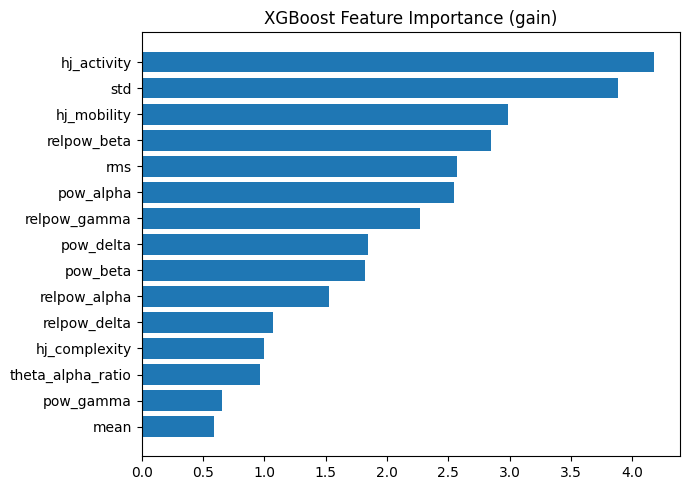


[Saved] Model -> /content/xgb_bonn_model.joblib
[Saved] Features -> /content/eeg_features.parquet
[Saved] Report -> /content/xgb_report.json


In [15]:
# ========= Imports =========
import os, glob, json, joblib
import numpy as np
import pandas as pd

from scipy.stats import skew, kurtosis
from scipy.signal import welch

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import xgboost as xgb
import matplotlib.pyplot as plt

# ========= Config =========
DATA_ROOT = "/content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_FILTERED"
LABELS = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}
ASSUMED_FS = 173.61    # Bonn sampling rate; tweak if yours differs
NPERSEG = 256          # Welch window
CACHE_FEATS = "/content/eeg_features.parquet"  # cache to skip recompute later
MODEL_OUT   = "/content/xgb_bonn_model.joblib"
FEATS_OUT   = "/content/eeg_features.parquet"
REPORT_OUT  = "/content/xgb_report.json"

# ========= Feature Engineering =========
def bandpower_welch(sig, fs, bands, nperseg=256):
    f, Pxx = welch(sig, fs=fs, nperseg=min(nperseg, len(sig)))
    out = {}
    total_power = np.trapz(Pxx, f) + 1e-12
    for name, (lo, hi) in bands.items():
        idx = (f >= lo) & (f <= hi)
        bp = np.trapz(Pxx[idx], f[idx])
        out[f"pow_{name}"] = bp
        out[f"relpow_{name}"] = bp / total_power
    return out

def hjorth_params(sig):
    diff1 = np.diff(sig)
    diff2 = np.diff(diff1)
    var0 = np.var(sig) + 1e-12
    var1 = np.var(diff1) + 1e-12
    var2 = np.var(diff2) + 1e-12
    mobility = np.sqrt(var1/var0)
    complexity = np.sqrt(var2/var1) / mobility
    return {
        "hj_activity": var0,
        "hj_mobility": mobility,
        "hj_complexity": complexity,
    }

def extract_features(signal, fs=ASSUMED_FS):
    sig = np.asarray(signal, dtype=np.float64)
    # robust z-score (optional)
    sig = (sig - np.mean(sig)) / (np.std(sig) + 1e-12)

    feats = {}
    # Time domain
    feats["mean"] = np.mean(sig)
    feats["std"] = np.std(sig)
    feats["skew"] = skew(sig)
    feats["kurtosis"] = kurtosis(sig)
    feats["ptp"] = np.ptp(sig)  # peak-to-peak
    feats["rms"] = np.sqrt(np.mean(sig**2))

    # Hjorth
    feats.update(hjorth_params(sig))

    # Frequency domain
    bands = {
        "delta": (0.5, 4),
        "theta": (4, 8),
        "alpha": (8, 13),
        "beta":  (13, 30),
        "gamma": (30, 45),
    }
    feats.update(bandpower_welch(sig, fs, bands, nperseg=NPERSEG))

    # Ratios that often help EEG classification
    feats["alpha_beta_ratio"] = feats["pow_alpha"] / (feats["pow_beta"] + 1e-12)
    feats["theta_alpha_ratio"] = feats["pow_theta"] / (feats["pow_alpha"] + 1e-12)
    feats["delta_theta_ratio"] = feats["pow_delta"] / (feats["pow_theta"] + 1e-12)

    return feats

# ========= Data Loader (reads your folders) =========
def load_signals_from_root(data_root, labels_map):
    X, y, meta = [], [], []
    for folder, lbl in labels_map.items():
        folder_path = os.path.join(data_root, folder)
        if not os.path.isdir(folder_path):
            print(f"[WARN] Missing folder: {folder_path}")
            continue
        for fp in glob.glob(os.path.join(folder_path, "*.txt")):
            try:
                sig = np.loadtxt(fp)
                # sanitize: replace NaN/inf
                sig = np.nan_to_num(sig, nan=0.0, posinf=0.0, neginf=0.0)
                X.append(sig.astype(np.float32))
                y.append(lbl)
                meta.append({"path": fp, "folder": folder})
            except Exception as e:
                print(f"[SKIP] {fp} due to {e}")
    return X, np.array(y, dtype=int), pd.DataFrame(meta)

# ========= Build Feature Table =========
if os.path.exists(CACHE_FEATS):
    df = pd.read_parquet(CACHE_FEATS)
    y_all = df.pop("label").values.astype(int)
    meta = df.pop("path") if "path" in df.columns else None
    X_all = df
    print(f"[CACHE] Loaded features: {X_all.shape}")
else:
    X_raw, y_all, meta = load_signals_from_root(DATA_ROOT, LABELS)
    feature_rows = []
    for i, sig in enumerate(X_raw):
        feats = extract_features(sig, fs=ASSUMED_FS)
        feats["label"] = int(y_all[i])
        feats["path"]  = meta.loc[i, "path"]
        feature_rows.append(feats)
    df = pd.DataFrame(feature_rows)
    df.to_parquet(CACHE_FEATS, index=False)
    print(f"[SAVE] Features cached to {CACHE_FEATS}")
    y_all = df.pop("label").values.astype(int)
    meta = df.pop("path") if "path" in df.columns else None
    X_all = df

print("Feature matrix:", X_all.shape)

# ========= Quick single split score (fast sanity check) =========
X_tr, X_te, y_tr, y_te = train_test_split(
    X_all, y_all, test_size=0.2, stratify=y_all, random_state=42
)

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("xgb", xgb.XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        reg_alpha=0.0,
        objective="multi:softprob",
        eval_metric="mlogloss",
        random_state=42,
        n_jobs=-1,
    ))
])

pipe.fit(X_tr, y_tr)
pred = pipe.predict(X_te)
acc = accuracy_score(y_te, pred)
print(f"[Holdout] Accuracy: {acc:.3f}")
print("\n[Holdout] Classification Report:\n", classification_report(y_te, pred, digits=3))

# ========= 5-Fold Stratified CV (robust benchmark) =========
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for fold, (tr, va) in enumerate(skf.split(X_all, y_all), 1):
    pipe.fit(X_all.iloc[tr], y_all[tr])
    p = pipe.predict(X_all.iloc[va])
    a = accuracy_score(y_all[va], p)
    cv_scores.append(a)
    print(f"[CV] Fold {fold}: {a:.3f}")

print(f"[CV] Mean Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# ========= Feature Importance (gain) =========
# Fit once on full data to inspect importances
pipe.fit(X_all, y_all)
booster = pipe.named_steps["xgb"]
gain_importance = booster.get_booster().get_score(importance_type="gain")

# Map back to column names
imp_df = pd.DataFrame([
    {"feature": X_all.columns[int(k.replace('f',''))], "gain": v}
    for k, v in gain_importance.items()
]).sort_values("gain", ascending=False)

print("\nTop features by gain:\n", imp_df.head(15))

# Plot (optional)
plt.figure(figsize=(7,5))
topk = imp_df.head(15)
plt.barh(topk["feature"], topk["gain"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance (gain)")
plt.tight_layout()
plt.show()

# ========= Persist artifacts =========
joblib.dump(pipe, MODEL_OUT)
X_all.assign(label=y_all).to_parquet(FEATS_OUT, index=False)
with open(REPORT_OUT, "w") as f:
    json.dump({
        "holdout_acc": float(acc),
        "cv_mean_acc": float(np.mean(cv_scores)),
        "cv_std_acc": float(np.std(cv_scores)),
        "top_features": topk.to_dict(orient="records")
    }, f, indent=2)

print(f"\n[Saved] Model -> {MODEL_OUT}")
print(f"[Saved] Features -> {FEATS_OUT}")
print(f"[Saved] Report -> {REPORT_OUT}")


In [36]:
# =========================
# CNN + LSTM for Bonn EEG
# =========================
import os, glob, math, random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torch.cuda.amp import autocast, GradScaler

# ---------- Config ----------
DATA_ROOT = "/content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_FILTERED"
LABELS = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}   # maps folder -> class id
SEQ_LEN = 4096
BATCH_SIZE = 32
EPOCHS = 40
LR = 1e-3
PATIENCE = 8                 # early stopping patience (epochs)
MODEL_OUT = "/content/cnn_lstm_bonn.pt"
SEED = 42

# ---------- Repro ----------
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True

# ---------- Dataset ----------
class BonnEEGDataset(Dataset):
    def __init__(self, data_root, labels_map, seq_len=4096, augment=False):
        self.paths, self.y = [], []
        for folder, y in labels_map.items():
            fdir = os.path.join(data_root, folder)
            files = sorted(glob.glob(os.path.join(fdir, "*.txt")))
            for fp in files:
                self.paths.append(fp)
                self.y.append(y)
        self.seq_len = seq_len
        self.augment = augment

    def __len__(self): return len(self.paths)

    def _zscore(self, x):
        return (x - x.mean()) / (x.std() + 1e-6)

    def _random_time_shift(self, x, max_shift=64):
        if max_shift <= 0: return x
        s = np.random.randint(-max_shift, max_shift+1)
        return np.roll(x, s)

    def _random_dropout(self, x, max_frac=0.03):
        # zero-out a short random chunk
        if max_frac <= 0: return x
        L = len(x)
        w = np.random.randint(1, int(L*max_frac)+1)
        i = np.random.randint(0, L-w+1)
        x = x.copy()
        x[i:i+w] = 0.0
        return x

    def __getitem__(self, idx):
        sig = np.loadtxt(self.paths[idx]).astype(np.float32)
        # trim/pad
        sig = sig[:self.seq_len]
        if len(sig) < self.seq_len:
            sig = np.pad(sig, (0, self.seq_len - len(sig)))
        # per-sample z-score
        sig = self._zscore(sig)

        if self.augment:
            # light, label-preserving augmentations
            if np.random.rand() < 0.5:
                sig = self._random_time_shift(sig, max_shift=64)
            if np.random.rand() < 0.3:
                sig = self._random_dropout(sig, max_frac=0.03)

        # shape (channels=1, seq_len)
        x = torch.tensor(sig).unsqueeze(0)   # (1, 4096)
        y = torch.tensor(self.y[idx]).long()
        return x, y

# ---------- Data split ----------
full_ds = BonnEEGDataset(DATA_ROOT, LABELS, seq_len=SEQ_LEN, augment=False)

# Stratified indices
indices = np.arange(len(full_ds))
y_all = np.array(full_ds.y)
train_idx, val_idx = train_test_split(
    indices, test_size=0.2, random_state=SEED, stratify=y_all
)

# Augment only on train
train_ds = BonnEEGDataset(DATA_ROOT, LABELS, seq_len=SEQ_LEN, augment=True)
val_ds   = BonnEEGDataset(DATA_ROOT, LABELS, seq_len=SEQ_LEN, augment=False)

train_loader = DataLoader(Subset(train_ds, train_idx), batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(Subset(val_ds,   val_idx),   batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# ---------- Model ----------
class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch, k=7, p=None):
        super().__init__()
        pad = (k//2) if p is None else p
        self.net = nn.Sequential(
            nn.Conv1d(in_ch, out_ch, kernel_size=k, padding=pad),
            nn.BatchNorm1d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv1d(out_ch, out_ch, kernel_size=5, padding=2),
            nn.BatchNorm1d(out_ch),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2)  # /2
        )
    def forward(self, x): return self.net(x)

class CNN_LSTM(nn.Module):
    def __init__(self, n_classes, n_channels=1, seq_len=4096, lstm_hidden=128, lstm_layers=1):
        super().__init__()
        # CNN front-end (extract local motifs)
        self.c1 = ConvBlock(n_channels, 32, k=9)   # wide kernel first
        self.c2 = ConvBlock(32, 64, k=7)
        self.c3 = ConvBlock(64, 128, k=5)
        # after 3 pools, seq_len reduces by /8
        self.reduced_len = seq_len // 8
        # LSTM (temporal integration over feature sequence)
        self.lstm = nn.LSTM(
            input_size=128, hidden_size=lstm_hidden, num_layers=lstm_layers,
            batch_first=True, bidirectional=True, dropout=0.0 if lstm_layers==1 else 0.2
        )
        # Attention-style pooling (mean + max)
        self.head = nn.Sequential(
            nn.Linear(lstm_hidden*2*2, 128),  # concat(mean,max)
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        # x: (B, 1, 4096)
        x = self.c1(x)      # (B, 32, 2048)
        x = self.c2(x)      # (B, 64, 1024)
        x = self.c3(x)      # (B,128, 512)
        x = x.permute(0, 2, 1)  # (B, T=512, F=128)
        out, _ = self.lstm(x)   # (B, T, 2*hidden)
        # temporal pooling
        mean_pool = out.mean(dim=1)
        max_pool, _ = out.max(dim=1)
        feats = torch.cat([mean_pool, max_pool], dim=1)  # (B, 2*hidden*2)
        logits = self.head(feats)
        return logits

# ---------- Train/Eval ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_LSTM(n_classes=len(LABELS), n_channels=1, seq_len=SEQ_LEN, lstm_hidden=128, lstm_layers=1).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)
scaler = GradScaler(enabled=torch.cuda.is_available())

best_val = 0.0
epochs_no_improve = 0

def evaluate(model, loader):
    model.eval()
    all_y, all_p = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
            with autocast(enabled=torch.cuda.is_available()):
                logits = model(xb)
            preds = logits.argmax(1)
            all_y.append(yb.cpu().numpy())
            all_p.append(preds.cpu().numpy())
    y_true = np.concatenate(all_y); y_pred = np.concatenate(all_p)
    acc = accuracy_score(y_true, y_pred)
    return acc, y_true, y_pred

for epoch in range(1, EPOCHS+1):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        with autocast(enabled=torch.cuda.is_available()):
            logits = model(xb)
            loss = criterion(logits, yb)
        scaler.scale(loss).backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        scaler.step(optimizer)
        scaler.update()
        running_loss += loss.item()

    # val
    val_acc, y_true, y_pred = evaluate(model, val_loader)
    scheduler.step()

    print(f"Epoch {epoch:02d}/{EPOCHS} | Train Loss={running_loss:.3f} | Val Acc={val_acc:.3f}")
    if val_acc > best_val + 1e-4:
        best_val = val_acc
        epochs_no_improve = 0
        torch.save({"model_state": model.state_dict(),
                    "val_acc": best_val,
                    "epoch": epoch}, MODEL_OUT)
        print(f"  ✅ New best. Saved -> {MODEL_OUT}")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("  ⛔ Early stopping triggered.")
            break

# ---------- Final report (best checkpoint) ----------
ckpt = torch.load(MODEL_OUT, map_location=device)
model.load_state_dict(ckpt["model_state"])
val_acc, y_true, y_pred = evaluate(model, val_loader)
print(f"\nBest Val Acc (reloaded): {val_acc:.3f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


/tmp/ipython-input-1448877933.py:160: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=torch.cuda.is_available())
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 01/40 | Train Loss=19.580 | Val Acc=0.200
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 02/40 | Train Loss=14.328 | Val Acc=0.620
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 03/40 | Train Loss=10.823 | Val Acc=0.410


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 04/40 | Train Loss=9.043 | Val Acc=0.690
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 05/40 | Train Loss=7.794 | Val Acc=0.760
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 06/40 | Train Loss=7.459 | Val Acc=0.780
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 07/40 | Train Loss=7.397 | Val Acc=0.770


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 08/40 | Train Loss=6.185 | Val Acc=0.780


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 09/40 | Train Loss=6.036 | Val Acc=0.780


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 10/40 | Train Loss=6.822 | Val Acc=0.820
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 11/40 | Train Loss=6.052 | Val Acc=0.860
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 12/40 | Train Loss=5.699 | Val Acc=0.890
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 13/40 | Train Loss=5.419 | Val Acc=0.850


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 14/40 | Train Loss=5.377 | Val Acc=0.810


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 15/40 | Train Loss=6.263 | Val Acc=0.800


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 16/40 | Train Loss=4.801 | Val Acc=0.850


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 17/40 | Train Loss=4.312 | Val Acc=0.900
  ✅ New best. Saved -> /content/cnn_lstm_bonn.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 18/40 | Train Loss=3.565 | Val Acc=0.800


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 19/40 | Train Loss=3.880 | Val Acc=0.800


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 20/40 | Train Loss=3.664 | Val Acc=0.870


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 21/40 | Train Loss=3.070 | Val Acc=0.890


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 22/40 | Train Loss=2.344 | Val Acc=0.790


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 23/40 | Train Loss=2.396 | Val Acc=0.870


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 24/40 | Train Loss=2.080 | Val Acc=0.880


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:186: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 25/40 | Train Loss=2.268 | Val Acc=0.880
  ⛔ Early stopping triggered.


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-1448877933.py:171: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):



Best Val Acc (reloaded): 0.900

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.750     0.857        20
           1      0.773     0.850     0.810        20
           2      0.909     1.000     0.952        20
           3      1.000     0.950     0.974        20
           4      0.864     0.950     0.905        20

    accuracy                          0.900       100
   macro avg      0.909     0.900     0.900       100
weighted avg      0.909     0.900     0.900       100

Confusion Matrix:
 [[15  5  0  0  0]
 [ 0 17  0  0  3]
 [ 0  0 20  0  0]
 [ 0  0  1 19  0]
 [ 0  0  1  0 19]]


#CNN-LSTM-XGBoost

In [39]:
# ============================
# CNN–LSTM → XGBoost Pipeline
# Task: Seizure detection (binary)
# Positive class: folder 'S'
# ============================
import os, glob, random, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, roc_auc_score, roc_curve, classification_report)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torch.cuda.amp import autocast, GradScaler

import xgboost as xgb

# -------- Config --------
DATA_ROOT = "/content/drive/MyDrive/EEG_DATA_REPO/EEGDATA_FILTERED"
ALL_LABELS = {'F':0, 'N':1, 'O':2, 'S':3, 'Z':4}     # existing mapping
SEIZURE_FOLDERS = {'S'}                               # positive class
SEQ_LEN = 4096
BATCH_SIZE = 32
EPOCHS = 25
LR = 1e-3
PATIENCE = 6
SEED = 42
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_OUT = "/content/cnn_lstm_seizure.pt"

# -------- Repro ----------
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True

# -------- Dataset --------
class BonnEEGBinary(Dataset):
    def __init__(self, data_root, seq_len=4096, augment=False):
        self.seq_len = seq_len
        self.augment = augment
        self.paths, self.y = [], []

        # scan folders
        for folder in sorted(os.listdir(data_root)):
            fpath = os.path.join(data_root, folder)
            if not os.path.isdir(fpath): continue
            files = sorted(glob.glob(os.path.join(fpath, "*.txt")))
            for fp in files:
                self.paths.append(fp)
                # binary label: 1 if seizure folder 'S'
                self.y.append(1 if os.path.basename(fpath) in SEIZURE_FOLDERS else 0)

        self.y = np.array(self.y, dtype=np.int64)

    def __len__(self): return len(self.paths)

    def _zscore(self, x): return (x - x.mean()) / (x.std() + 1e-6)

    def _time_shift(self, x, max_shift=64):
        if max_shift <= 0: return x
        s = np.random.randint(-max_shift, max_shift+1)
        return np.roll(x, s)

    def _drop_chunk(self, x, max_frac=0.03):
        if max_frac <= 0: return x
        L = len(x)
        w = np.random.randint(1, max(2, int(L*max_frac)))
        i = np.random.randint(0, L-w+1)
        x = x.copy(); x[i:i+w] = 0.0
        return x

    def __getitem__(self, idx):
        sig = np.loadtxt(self.paths[idx]).astype(np.float32)
        sig = sig[:self.seq_len]
        if len(sig) < self.seq_len:
            sig = np.pad(sig, (0, self.seq_len - len(sig)))

        sig = self._zscore(sig)

        if self.augment:
            if np.random.rand() < 0.5:
                sig = self._time_shift(sig, 64)
            if np.random.rand() < 0.3:
                sig = self._drop_chunk(sig, 0.03)

        x = torch.tensor(sig).unsqueeze(0)   # (1, 4096)
        y = torch.tensor(self.y[idx]).long() # 0/1
        return x, y

# build dataset & stratified split (binary)
full_ds = BonnEEGBinary(DATA_ROOT, seq_len=SEQ_LEN, augment=False)
indices = np.arange(len(full_ds))
y_all = full_ds.y
train_idx, val_idx = train_test_split(indices, test_size=0.2, random_state=SEED, stratify=y_all)

train_ds = BonnEEGBinary(DATA_ROOT, seq_len=SEQ_LEN, augment=True)
val_ds   = BonnEEGBinary(DATA_ROOT, seq_len=SEQ_LEN, augment=False)
train_loader = DataLoader(Subset(train_ds, train_idx), batch_size=BATCH_SIZE, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(Subset(val_ds,   val_idx),   batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# -------- Model (CNN + LSTM) --------
class ConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch, k=7):
        super().__init__()
        pad = k // 2
        self.net = nn.Sequential(
            nn.Conv1d(in_ch, out_ch, kernel_size=k, padding=pad),
            nn.BatchNorm1d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv1d(out_ch, out_ch, kernel_size=5, padding=2),
            nn.BatchNorm1d(out_ch),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2)  # /2
        )
    def forward(self, x): return self.net(x)

class CNN_LSTM_FE(nn.Module):
    """
    Feature extractor head returns a pooled sequence embedding.
    We'll use that embedding for XGBoost.
    """
    def __init__(self, n_channels=1, seq_len=4096, lstm_hidden=128, lstm_layers=1, p_drop=0.4):
        super().__init__()
        self.c1 = ConvBlock(n_channels, 32, k=9)
        self.c2 = ConvBlock(32, 64, k=7)
        self.c3 = ConvBlock(64, 128, k=5)
        self.reduced_len = seq_len // 8
        self.lstm = nn.LSTM(
            input_size=128, hidden_size=lstm_hidden, num_layers=lstm_layers,
            batch_first=True, bidirectional=True, dropout=0.0 if lstm_layers==1 else 0.2
        )
        self.dropout = nn.Dropout(p_drop)
        # small binary head for pretraining
        self.cls = nn.Linear(4*lstm_hidden, 2)  # (mean+max) of biLSTM -> 4*hidden

    def forward(self, x, return_embedding=False):
        # x: (B, 1, 4096)
        x = self.c1(x)      # (B, 32, 2048)
        x = self.c2(x)      # (B, 64, 1024)
        x = self.c3(x)      # (B,128, 512)
        x = x.permute(0, 2, 1)     # (B, T=512, F=128)
        h, _ = self.lstm(x)        # (B, T, 2*hidden)
        mean_pool = h.mean(dim=1)  # (B, 2*hidden)
        max_pool, _ = h.max(dim=1) # (B, 2*hidden)
        feats = torch.cat([mean_pool, max_pool], dim=1)  # (B, 4*hidden)
        feats = self.dropout(feats)
        logits = self.cls(feats)
        if return_embedding:
            return logits, feats
        return logits

# -------- Train FE on binary labels (for stable embeddings) --------
def train_feature_extractor(train_loader, val_loader, epochs=EPOCHS, lr=LR, out_path=MODEL_OUT):
    model = CNN_LSTM_FE(n_channels=1, seq_len=SEQ_LEN, lstm_hidden=128, lstm_layers=1, p_drop=0.4).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    scaler = GradScaler(enabled=torch.cuda.is_available())

    best_val, no_improve = 0.0, 0
    def eval_bin(loader):
        model.eval(); ys, ps = [], []
        with torch.no_grad():
            for xb, yb in loader:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                with autocast(enabled=torch.cuda.is_available()):
                    logits = model(xb)
                    preds = logits.argmax(dim=1)
                ys.append(yb.cpu().numpy()); ps.append(preds.cpu().numpy())
        y_true = np.concatenate(ys); y_pred = np.concatenate(ps)
        return accuracy_score(y_true, y_pred), y_true, y_pred

    for ep in range(1, epochs+1):
        model.train(); run_loss = 0.0
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad(set_to_none=True)
            with autocast(enabled=torch.cuda.is_available()):
                logits = model(xb)
                loss = criterion(logits, yb)
            scaler.scale(loss).backward()
            nn.utils.clip_grad_norm_(model.parameters(), 2.0)
            scaler.step(optimizer); scaler.update()
            run_loss += loss.item()

        val_acc, _, _ = eval_bin(val_loader)
        scheduler.step()
        print(f"Epoch {ep:02d}/{epochs} | TrainLoss={run_loss:.3f} | ValAcc={val_acc:.3f}")

        if val_acc > best_val + 1e-4:
            best_val, no_improve = val_acc, 0
            torch.save({"state_dict": model.state_dict(), "val_acc": best_val}, out_path)
            print(f"  ✅ Saved feature extractor → {out_path}")
        else:
            no_improve += 1
            if no_improve >= PATIENCE:
                print("  ⛔ Early stopping.")
                break

    ckpt = torch.load(out_path, map_location=DEVICE)
    model.load_state_dict(ckpt["state_dict"])
    return model

fe_model = train_feature_extractor(train_loader, val_loader, epochs=EPOCHS, lr=LR, out_path=MODEL_OUT)

# -------- Extract embeddings (train/val) --------
from tqdm import tqdm

def extract_embeddings(model, loader):
    model.eval(); X, y = [], []
    with torch.no_grad():
        for xb, yb in tqdm(loader, desc="Embed"):
            xb = xb.to(DEVICE)
            logits, feats = model(xb, return_embedding=True)  # feats: (B, 4*hidden)
            X.append(feats.cpu().numpy())
            y.append(yb.numpy())
    return np.vstack(X), np.concatenate(y)

train_loader_eval = DataLoader(Subset(train_ds, train_idx), batch_size=64, shuffle=False)
val_loader_eval   = DataLoader(Subset(val_ds,   val_idx),   batch_size=64, shuffle=False)

X_tr, y_tr = extract_embeddings(fe_model, train_loader_eval)
X_val, y_val = extract_embeddings(fe_model, val_loader_eval)
print("Embeddings:", X_tr.shape, X_val.shape)

# -------- XGBoost on embeddings (binary) --------
xgb_clf = xgb.XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.0,
    objective="binary:logistic",
    eval_metric="logloss",   # <-- FIXED
    use_label_encoder=False
)

xgb_clf.fit(X_tr, y_tr)

val_preds = xgb_clf.predict(X_val)

print("\nCNN-LSTM Embeddings + XGBoost Results")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Classification Report:\n", classification_report(y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))
print("ROC AUC:", roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1]))



/tmp/ipython-input-331965069.py:158: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=torch.cuda.is_available())
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 01/25 | TrainLoss=6.092 | ValAcc=0.800
  ✅ Saved feature extractor → /content/cnn_lstm_seizure.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 02/25 | TrainLoss=3.122 | ValAcc=0.750


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 03/25 | TrainLoss=1.739 | ValAcc=0.930
  ✅ Saved feature extractor → /content/cnn_lstm_seizure.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 04/25 | TrainLoss=0.840 | ValAcc=0.990
  ✅ Saved feature extractor → /content/cnn_lstm_seizure.pt


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 05/25 | TrainLoss=0.385 | ValAcc=0.950


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 06/25 | TrainLoss=0.370 | ValAcc=0.990


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 07/25 | TrainLoss=0.523 | ValAcc=0.980


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 08/25 | TrainLoss=0.263 | ValAcc=0.980


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 09/25 | TrainLoss=0.283 | ValAcc=0.990


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/tmp/ipython-input-331965069.py:178: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipython-input-331965069.py:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


Epoch 10/25 | TrainLoss=0.103 | ValAcc=0.990
  ⛔ Early stopping.


Embed: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:25:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Embeddings: (400, 512) (100, 512)

CNN-LSTM Embeddings + XGBoost Results
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.95      0.97        20

    accuracy                           0.99       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
 [[80  0]
 [ 1 19]]
ROC AUC: 0.9931249999999999
